In [21]:
import xarray as xr
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
with open('trainInput.npy', 'rb') as f:
    trainInput = np.load(f)
    
with open('trainOutput.npy', 'rb') as f:
    trainOutput = np.load(f)
    
with open('testInput.npy', 'rb') as f:
    testInput = np.load(f)
    
with open('testOutput.npy', 'rb') as f:
    testOutput = np.load(f)

In [3]:
trainInput.shape

(6357811, 155)

In [4]:
trainOutput.shape

(6357811, 60)

In [5]:
testInput.shape

(1589453, 155)

In [6]:
testOutput.shape

(1589453, 60)

In [7]:
smalltrainInput = trainInput[0:80000,:]
smalltrainOutput = trainOutput[0:80000,:]
smalltestInput = testInput[0:20000,:]
smalltestOutput = testOutput[0:20000,:]

In [8]:
smalltrainInput.shape

(80000, 155)

In [9]:
smalltrainOutput.shape

(80000, 60)

In [10]:
smalltestInput.shape

(20000, 155)

In [11]:
smalltestOutput.shape

(20000, 60)

In [ ]:
smalltrai

In [12]:
model = Sequential()
model.add(Dense(186, input_dim=155, kernel_initializer='normal', activation='relu'))
model.add(Dense(217, kernel_initializer='normal', activation='relu'))
model.add(Dense(104, kernel_initializer='normal', activation='relu'))
#model.add(Dense(201, kernel_initializer='normal', activation='relu'))
#model.add(Dense(154, kernel_initializer='normal', activation='relu'))
#model.add(Dense(107, kernel_initializer='normal', activation='relu'))
model.add(Dense(60, activation='linear'))


In [39]:
#opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#model.compile(loss='mse', optimizer=opt)
new_lr = 0.01
model.compile(optimizer = 'adam', loss = 'mse')
model.optimizer.lr.assign(new_lr)

<tf.Tensor 'Assign:0' shape=() dtype=float32_ref>

In [ ]:
trainFit = model.fit(trainInput, trainOutput, validation_split = .2, batch_size = 1563, epochs = 20)

Train on 5086248 samples, validate on 1271563 samples
Epoch 1/100
5086248/5086248 [==============================] - 35s 7us/step - loss: 0.0116 - val_loss: 0.0110
Epoch 2/100
5086248/5086248 [==============================] - 42s 8us/step - loss: 0.0104 - val_loss: 0.0103
Epoch 3/100
5086248/5086248 [==============================] - 42s 8us/step - loss: 0.0098 - val_loss: 0.0096
Epoch 4/100
5086248/5086248 [==============================] - 41s 8us/step - loss: 0.0093 - val_loss: 0.0092
Epoch 5/100
5086248/5086248 [==============================] - 41s 8us/step - loss: 0.0090 - val_loss: 0.0090
Epoch 6/100
5086248/5086248 [==============================] - 41s 8us/step - loss: 0.0088 - val_loss: 0.0088
Epoch 7/100
5086248/5086248 [==============================] - 39s 8us/step - loss: 0.0086 - val_loss: 0.0086
Epoch 8/100
5086248/5086248 [==============================] - 38s 7us/step - loss: 0.0084 - val_loss: 0.0086
Epoch 9/100
1949061/5086248 [==========>...................] - ETA

In [15]:
type(trainFit)

keras.callbacks.History

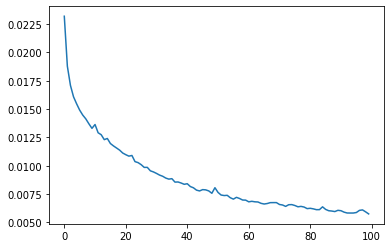

In [16]:
plt.plot(trainFit.history["loss"])